- percentile threshold
- data classification

In [ ]:
STATION,DATETIME,VALUE
684,2002-03-01 00:00:00,
684,2002-03-01 00:10:00,
684,2002-03-01 00:20:00,
684,2002-03-01 00:30:00,
684,2002-03-01 00:40:00,
684,2002-03-01 00:50:00,
684,2002-03-01 01:00:00,

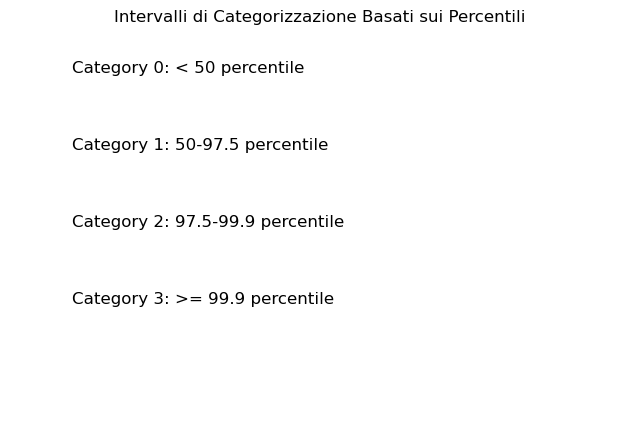

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Intervalli e categorie
categories = ['< 50 percentile', '50-97.5 percentile', '97.5-99.9 percentile', '>= 99.9 percentile']
values = [0, 1, 2, 3]

# Crea una figura
fig, ax = plt.subplots(figsize=(8, 5))
ax.axis('off')  # Rimuovi gli assi

# Aggiungi la legenda manualmente
for i, (category, value) in enumerate(zip(categories, values)):
    ax.text(0.1, 0.9 - i * 0.2, f'Category {value}: {category}', fontsize=12, verticalalignment='center')

# Mostra il grafico
plt.title('Intervalli di Categorizzazione Basati sui Percentili')
plt.show()


In [ ]:
0 NO RAIN <= 50th percentile
1 LIGHT ]50, 97.5[
2 HEAVY [97.5, 99.9[
3 EXTREME97 >= 99.9

In [12]:
#da 10MINUTES2

import pandas as pd

# Load the CSV file
df = pd.read_csv('combined_data_9gauges.csv')

# Filter data where 'VALUE' is greater than 0
filtered_df = df[df['VALUE'] > 0].copy()  # Create a copy to avoid the SettingWithCopyWarning

# Convert the 'DATETIME' column to datetime type
df.loc[filtered_df.index, 'DATETIME'] = pd.to_datetime(filtered_df['DATETIME'])

# Calculate percentiles
percentiles = [50, 90, 97.5, 99.8, 99.9, 100]
percentile_values = filtered_df['VALUE'].quantile(q=[p/100 for p in percentiles])

# Print percentiles
for percentile, value in zip(percentiles, percentile_values):
    print(f"{percentile}th percentile: {value}")


50th percentile: 0.4
90th percentile: 1.2
97.5th percentile: 2.8
99.8th percentile: 10.4
99.9th percentile: 13.0
100th percentile: 26.9


In [5]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('combined_data_9gauges.csv')

# Filter data where 'VALUE' is greater than 0
filtered_df = df[df['VALUE'] > 0].copy()  # Create a copy to avoid the SettingWithCopyWarning

# Convert the 'DATETIME' column to datetime type
filtered_df['DATETIME'] = pd.to_datetime(filtered_df['DATETIME'])

# Filter data for months 3 (March), 4 (April), and 5 (May)
filtered_df = filtered_df[filtered_df['DATETIME'].dt.month.isin([9, 10, 11])]

# Calculate percentiles
percentiles = [50, 90, 97.5, 99.8, 99.9, 100]
percentile_values = filtered_df['VALUE'].quantile(q=[p/100 for p in percentiles])

# Print percentiles
for percentile, value in zip(percentiles, percentile_values):
    print(f"{percentile}th percentile: {value:.1f}")


50th percentile: 0.4
90th percentile: 1.6
97.5th percentile: 4.2
99.8th percentile: 13.0
99.9th percentile: 15.2
100th percentile: 26.6


In [21]:
import pandas as pd

# Load the CSV file


# Load data
#df = pd.read_csv('combined_data_9gauges.csv')
#df = pd.read_csv('75gauges.csv')
#df = pd.read_csv('75gauges6H.csv')
#df = pd.read_csv('75gauges12H.csv')
df = pd.read_csv('75gauges24H.csv')

# List of stations of interest
stations_of_interest = [779, 750, 684, 695, 718, 756, 706, 764, 729]

# Filter data where 'VALUE' is greater than 0 and 'STATION' is in the list of stations of interest
filtered_df = df[(df['VALUE'] > 0) & (df['STATION'].isin(stations_of_interest))].copy()  # Create a copy to avoid the SettingWithCopyWarning

# Convert the 'DATETIME' column to datetime type
filtered_df['DATETIME'] = pd.to_datetime(filtered_df['DATETIME'])

# Filter data for months 3 (March), 4 (April), and 5 (May)
filtered_df = filtered_df[filtered_df['DATETIME'].dt.month.isin([9, 10, 11])]

# Calculate percentiles
percentiles = [50, 90, 97.5, 99.8, 99.9, 100]
percentile_values = filtered_df['VALUE'].quantile(q=[p/100 for p in percentiles])

# Print percentiles with 2 decimal places
for percentile, value in zip(percentiles, percentile_values):
    print(f"{percentile}th percentile: {value:.1f}")


50th percentile: 2.2
90th percentile: 16.8
97.5th percentile: 30.6
99.8th percentile: 63.8
99.9th percentile: 66.6
100th percentile: 144.4


In [36]:
import pandas as pd
import os

# Define the path to the CSV file in the PAL1 folder
input_file = os.path.join('PAL1', 'categorized_data.csv')

# Load the CSV file
df = pd.read_csv(input_file)

# Filter rows where CATEGORY_LABEL is 'EXTREME'
extreme_df = df[df['CATEGORY_LABEL'] == 'EXTREME']

# Display the filtered DataFrame
print(extreme_df)

# If you want to save the filtered data to a new CSV file
output_file = os.path.join('PAL1', 'extreme_category_data.csv')
extreme_df.to_csv(output_file, index=False)

print(f"Filtered data saved to '{output_file}'")


      STATION    DATETIME  VALUE  CATEGORY CATEGORY_LABEL
1439      706  2020-03-25  101.2         3        EXTREME
3360      750  2020-03-25   92.8         3        EXTREME
3458      750  2023-05-15   72.8         3        EXTREME
3587      756  2007-03-09   89.4         3        EXTREME
4003      756  2020-03-25   73.0         3        EXTREME
4532      764  2020-03-25   77.2         3        EXTREME
Filtered data saved to 'PAL1\extreme_category_data.csv'


In [ ]:
i dati a 10 minuti stanno in combined_data_9gauges.csv

In [52]:
import pandas as pd
import os

# Load the CSV file
df = pd.read_csv('combined_data_9gauges.csv')

# List of stations of interest
stations_of_interest = [779, 750, 684, 695, 718, 756, 706, 764, 729]

# Filter data where 'VALUE' is greater than 0 and 'STATION' is in the list of stations of interest
filtered_df = df[(df['VALUE'] > 0) & (df['STATION'].isin(stations_of_interest))].copy()  # Create a copy to avoid the SettingWithCopyWarning

# Convert the 'DATETIME' column to datetime type
filtered_df['DATETIME'] = pd.to_datetime(filtered_df['DATETIME'])

# Filter data for months 3 (March), 4 (April), and 5 (May)
filtered_df = filtered_df[filtered_df['DATETIME'].dt.month.isin([9, 10, 11])]

# Calculate percentiles
percentiles = [50, 97.5, 99.9]
percentile_values = filtered_df['VALUE'].quantile(q=[p/100 for p in percentiles]).to_list()

# Define function to assign categories based on percentile values
def categorize_value(value):
    if value < percentile_values[0]:
        return 0
    elif value < percentile_values[1]:
        return 1
    elif value < percentile_values[2]:
        return 2
    else:
        return 3

# Apply the categorization function to the 'VALUE' column
filtered_df['CATEGORY'] = filtered_df['VALUE'].apply(categorize_value)

# Define function to assign category labels
def categorize_label(category):
    if category == 0:
        return "NO RAIN"
    elif category == 1:
        return "LIGHT"
    elif category == 2:
        return "HEAVY"
    else:
        return "EXTREME"

# Apply the categorization label function to the 'CATEGORY' column
filtered_df['CATEGORY_LABEL'] = filtered_df['CATEGORY'].apply(categorize_label)

# Round the 'VALUE' column to 2 decimal places
filtered_df['VALUE'] = filtered_df['VALUE'].round(2)

# Create the output directory if it doesn't exist
output_dir = 'PAL1'
os.makedirs(output_dir, exist_ok=True)

# Save the new DataFrame to a CSV file in the output directory
output_file = os.path.join(output_dir, '01m_categorical4.csv')
filtered_df.to_csv(output_file, index=False)

print(f"Output saved to {output_file}")


Output saved to PAL1\01m_categorical4.csv


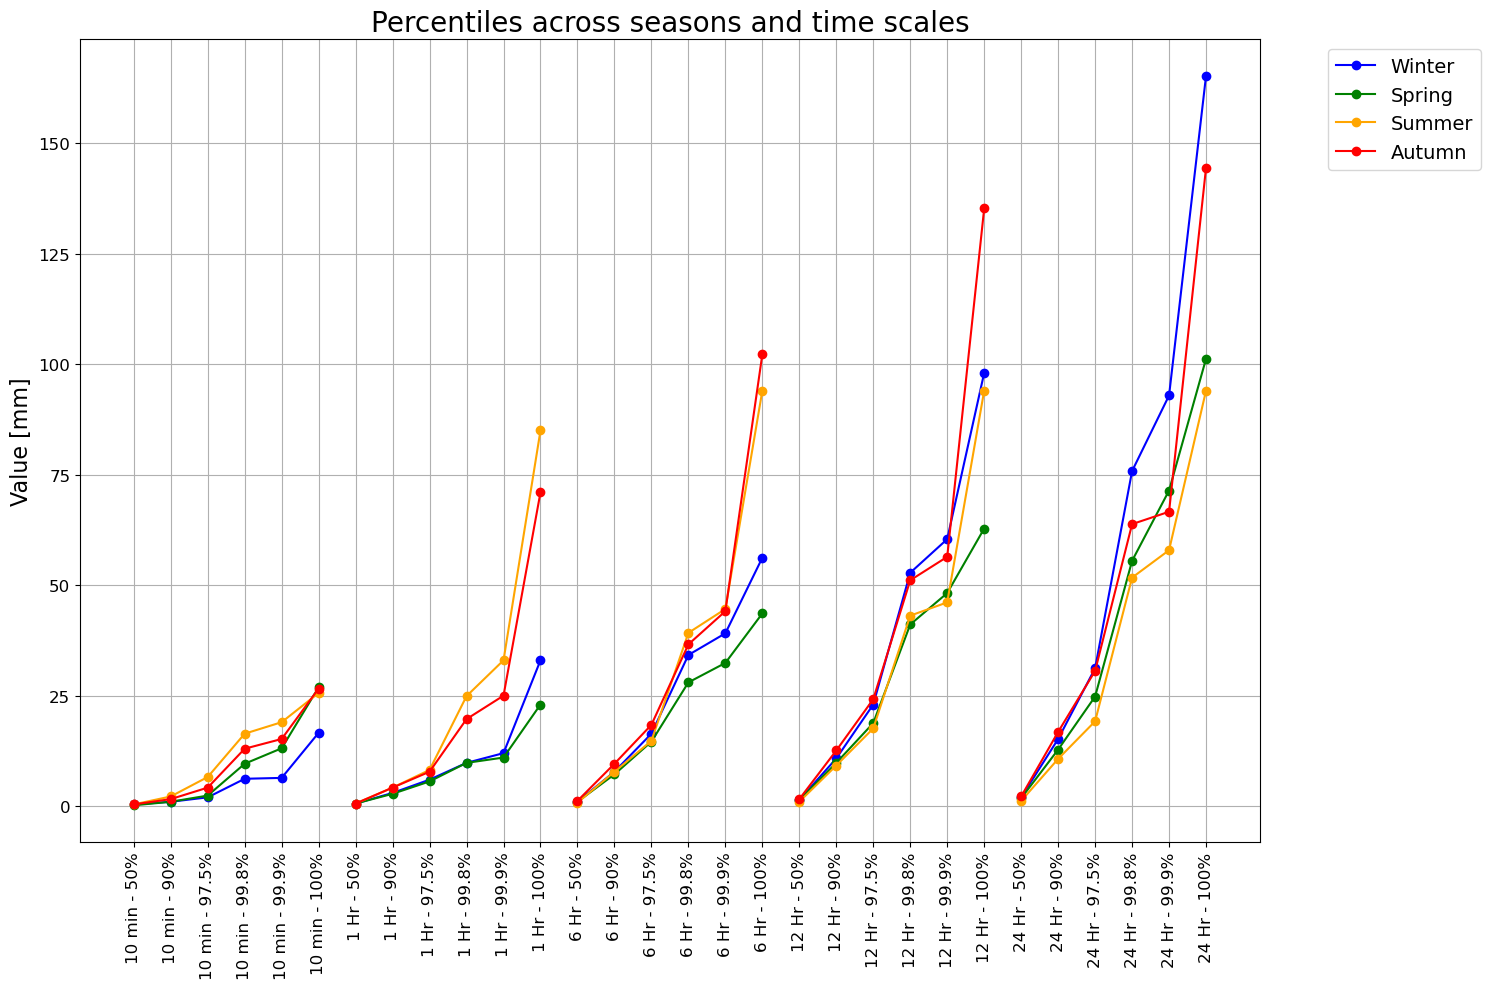

In [14]:
import matplotlib.pyplot as plt

# Dati di esempio
stagioni = ['Winter', 'Spring', 'Summer', 'Autumn']
percentili = ['50%', '90%', '97.5%', '99.8%', '99.9%', '100%']
scale_temporali = ['10 min', '1 Hr', '6 Hr', '12 Hr', '24 Hr']

# Supponiamo di avere i seguenti dati per ciascuna scala temporale
dati = {
    'Winter': {
        '10 min': [0.4, 1.0, 2.0, 6.2, 6.4, 16.6],
        '1 Hr': [0.6, 3.0, 6.0, 9.8, 12.0, 33.0],
        '6 Hr': [1.0, 7.8, 16.4, 34.2, 39.1, 56.2],
        '12 Hr': [1.4, 10.8, 23.0, 52.8, 60.4, 98.0],
        '24 Hr': [2.0, 15.2, 31.2, 75.8, 92.9, 165.2],
    },
    'Spring': {
        '10 min': [0.2, 1.0, 2.4, 9.6, 13.1, 26.9],
        '1 Hr': [0.6, 2.8, 5.6, 9.8, 11.0, 23.0],
        '6 Hr': [1.0, 7.2, 14.6, 28.0, 32.4, 43.6],
        '12 Hr': [1.4, 9.8, 18.8, 41.1, 48.2, 62.8],
        '24 Hr': [1.8, 12.8, 24.8, 55.5, 71.4, 101.2],
    },
    'Summer': {
        '10 min': [0.4, 2.2, 6.6, 16.4, 19.0, 25.6],
        '1 Hr': [0.6, 4.2, 8.2, 24.9, 33.0, 85.0],
        '6 Hr': [0.8, 7.8, 14.8, 39.2, 44.6, 94.0],
        '12 Hr': [1.0, 9.2, 17.6, 43.1, 46.1, 94.0],
        '24 Hr': [1.2, 10.7, 19.2, 51.7, 57.9, 94.0],
    },
    'Autumn': {
        '10 min': [0.4, 1.6, 4.2, 13.0, 15.2, 26.6],
        '1 Hr': [0.6, 4.2, 7.8, 19.7, 25.0, 71.0],
        '6 Hr': [1.2, 9.6, 18.4, 36.6, 44.1, 102.2],
        '12 Hr': [1.6, 12.6, 24.2, 51.1, 56.4, 135.2],
        '24 Hr': [2.2, 16.8, 30.6, 63.8, 66.6, 144.4],
    },
}

# Colori per le stagioni
colori = {
    'Winter': 'b',
    'Spring': 'g',
    'Summer': '#FFA500',
    'Autumn': '#FF0000',
}

# Creare il grafico con dimensioni maggiori
fig, ax = plt.subplots(figsize=(15, 10))

for stagione in stagioni:
    for scala in scale_temporali:
        x_values = [f"{scala} - {percentile}" for percentile in percentili]
        y_values = dati[stagione][scala]
        ax.plot(x_values, y_values, marker='o', color=colori[stagione], label=stagione)

# Aggiungere titolo e etichette con dimensioni maggiori
plt.title('Percentiles across seasons and time scales', fontsize=20)
#plt.xlabel('Percentiles and time scales', fontsize=16)
plt.ylabel('Value [mm]', fontsize=16)

# Aumentare dimensione etichette degli assi
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Aggiungere la leggenda fuori dal grafico con dimensioni maggiori
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.grid(True)
# Aggiungere layout regolato
plt.tight_layout()

plt.savefig('PAL1/Percentiles across seasons and time scales.jpg', format='jpg', dpi=300)


# Mostrare il grafico
plt.show()


In [ ]:
#per station

In [35]:
import os
import pandas as pd

# Define the path to the PAL1 folder and the categorical CSV file
pal1_folder = 'PAL2'
input_csv_path = os.path.join(pal1_folder, '01m_categorical4.csv')
output_folder = os.path.join(pal1_folder, '01m_categorical4')

# Create the output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Read the input CSV file
df = pd.read_csv(input_csv_path)

# Group the data by 'STATION' and save each group to a separate CSV file
for station, group in df.groupby('STATION'):
    output_csv_path = os.path.join(output_folder, f'01m_{station}_4.csv')
    group.to_csv(output_csv_path, index=False)

print(f"CSV files have been created in the folder: {output_folder}")


CSV files have been created in the folder: PAL2\01m_categorical4


In [ ]:
#altro ok

In [ ]:
2 NO RAIN < 90th (HEAVY) 
3 RAIN >= 90 

In [79]:
import pandas as pd
import os

# Load the CSV file
df = pd.read_csv('PAL1/1H_categorical1.csv')

# List of stations of interest
stations_of_interest = [779, 750, 684, 695, 718, 756, 706, 764, 729]

# Filter data where 'VALUE' is greater than 0 and 'STATION' is in the list of stations of interest
filtered_df = df[(df['VALUE'] > 0) & (df['STATION'].isin(stations_of_interest))].copy()  # Create a copy to avoid the SettingWithCopyWarning

# Convert the 'DATETIME' column to datetime type
filtered_df['DATETIME'] = pd.to_datetime(filtered_df['DATETIME'])

# Filter data for months 9 (September), 10 (October), and 11 (November)
filtered_df = filtered_df[filtered_df['DATETIME'].dt.month.isin([12, 1, 2])]

# Calculate percentiles
percentiles = [90]
percentile_values = filtered_df['VALUE'].quantile(q=[p/100 for p in percentiles]).to_list()

# Define function to assign categories based on percentile values
def categorize_value(value):
    if value < percentile_values[0]:
        return 2
    else:
        return 3

# Apply the categorization function to the 'VALUE' column
filtered_df['CATEGORY'] = filtered_df['VALUE'].apply(categorize_value)

# Define function to assign category labels
def categorize_label(category):
    if category == 2:
        return "NO RAIN"
    else:
        return "RAIN"

# Apply the categorization label function to the 'CATEGORY' column
#filtered_df['CATEGORY_LABEL'] = filtered_df['CATEGORY'].apply(categorize_label)

# Round the 'VALUE' column to 2 decimal places
filtered_df['VALUE'] = filtered_df['VALUE'].round(2)

# Create the output directory if it doesn't exist
output_dir = 'PAL2'
os.makedirs(output_dir, exist_ok=True)

# Save the new DataFrame to a CSV file in the output directory
output_file = os.path.join(output_dir, '01m_categorical3.csv')
filtered_df.to_csv(output_file, index=False)

print(f"Output saved to {output_file}")

Output saved to PAL2\01m_categorical3.csv


In [ ]:

1 RAIN since max, 3 rows with rain

0 NO RAIN otherwise

In [94]:
import pandas as pd

# Read the original CSV file
df = pd.read_csv('PAL2/01m_categorical4.csv')

# Ensure DATETIME is a datetime object
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

# Initialize a list to store the final DataFrames for each station
final_df_list = []

# Process each station separately
for station, station_df in df.groupby('STATION'):
    # Find all groups of consecutive rows with CATEGORY == 3
    station_df['GROUP'] = (station_df['CATEGORY'] != station_df['CATEGORY'].shift()).cumsum()

    # Initialize a list to store the rows for the new DataFrame
    new_rows = []

    # Iterate over each group where CATEGORY == 3
    for group in station_df[station_df['CATEGORY'] == 3]['GROUP'].unique():
        subset = station_df[(station_df['GROUP'] == group) & (station_df['CATEGORY'] == 3)]
        
        if len(subset) == 3:  # Ensure there are exactly 4 rows
            # Find the row with the maximum VALUE within this group
            max_idx = subset['VALUE'].idxmax()
            
            # Change the CATEGORY to 1 for the row with the maximum VALUE
            max_row = subset.loc[[max_idx]].copy()
            max_row['CATEGORY'] = 1
            
            # Add the max_row to the new list
            new_rows.append(max_row)
            
            # Add the remaining rows (excluding the max row) as CATEGORY 3
            remaining_rows = subset.drop(index=max_idx)
            new_rows.append(remaining_rows)

    # Convert the new rows list to a DataFrame
    new_df = pd.concat(new_rows)

    # Combine the new rows with the original rows not involved in any events
    station_df_unchanged = station_df[~station_df.index.isin(station_df[station_df['CATEGORY'] == 3]['GROUP'].index)]
    station_final_df = pd.concat([station_df_unchanged, new_df]).sort_values(by='DATETIME')

    # Drop the 'GROUP' column as it is no longer needed
    station_final_df = station_final_df.drop(columns=['GROUP'])

    # Append the processed station DataFrame to the final list
    final_df_list.append(station_final_df)

# Combine all processed station DataFrames into a final DataFrame
final_df = pd.concat(final_df_list).sort_values(by=['STATION', 'DATETIME'])

# Save the updated DataFrame to a new CSV file
final_df.to_csv('PAL2/01m_categorical4_updated.csv', index=False)

# Display the first few rows of the updated DataFrame to verify
print(final_df.head(20))


    STATION            DATETIME  VALUE  CATEGORY
0       684 2002-09-01 13:30:00    1.2         2
2       684 2002-09-01 14:50:00    0.2         2
3       684 2002-09-04 14:00:00    0.2         2
5       684 2002-09-14 22:40:00    0.6         2
6       684 2002-09-20 05:40:00    0.4         2
7       684 2002-09-22 08:00:00    0.2         2
8       684 2002-09-22 14:00:00    0.2         2
9       684 2002-09-23 11:10:00    0.4         2
10      684 2002-09-23 11:20:00    0.4         2
11      684 2002-09-23 11:30:00    0.6         2
12      684 2002-09-23 11:40:00    0.2         2
13      684 2002-09-23 20:20:00    1.2         2
15      684 2002-09-23 21:00:00    0.4         2
18      684 2002-10-04 02:10:00    0.6         2
19      684 2002-10-04 02:20:00    0.8         2
20      684 2002-10-04 02:30:00    0.6         2
21      684 2002-10-04 02:50:00    0.2         2
22      684 2002-10-04 04:00:00    0.6         2
23      684 2002-10-04 04:10:00    1.2         2
24      684 2002-10-

In [28]:
#nuovo

import pandas as pd

# Read the original CSV file
df = pd.read_csv('PAL2/01m_categorical4.csv')

# Ensure DATETIME is a datetime object
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

# Initialize a list to store the final DataFrames for each station
final_df_list = []

# Process each station separately
for station, station_df in df.groupby('STATION'):
    # Find all groups of consecutive rows with CATEGORY == 3
    station_df['GROUP'] = (station_df['CATEGORY'] != station_df['CATEGORY'].shift()).cumsum()

    # Initialize a list to store the rows for the new DataFrame
    new_rows = []

    # Iterate over each group where CATEGORY == 3
    for group in station_df[station_df['CATEGORY'] == 3]['GROUP'].unique():
        subset = station_df[(station_df['GROUP'] == group) & (station_df['CATEGORY'] == 3)]
        
        if not subset.empty:
            # Find the row with the maximum VALUE within this group
            max_idx = subset['VALUE'].idxmax()

            # Check if there are exactly 2 subsequent rows in CATEGORY == 3 after the max row
            if len(subset.loc[max_idx:]) >= 3:
                # Modify the CATEGORY of the max row to 1
                station_df.at[max_idx, 'CATEGORY'] = 1

                # Drop the subsequent 2 rows with CATEGORY == 3
                station_df = station_df.drop(subset.loc[max_idx:].iloc[1:3].index)

    # Drop the 'GROUP' column as it is no longer needed
    station_final_df = station_df.drop(columns=['GROUP'])

    # Append the processed station DataFrame to the final list
    final_df_list.append(station_final_df)

# Combine all processed station DataFrames into a final DataFrame
final_df = pd.concat(final_df_list).sort_values(by=['STATION', 'DATETIME'])

# Save the updated DataFrame to a new CSV file
final_df.to_csv('PAL2/01m_categorical4_updated.csv', index=False)

# Display the first few rows of the updated DataFrame to verify
print(final_df.head(20))


    STATION            DATETIME  VALUE  CATEGORY
0       684 2002-09-01 13:30:00    1.2         2
1       684 2002-09-01 13:40:00    1.6         3
2       684 2002-09-01 14:50:00    0.2         2
3       684 2002-09-04 14:00:00    0.2         2
4       684 2002-09-14 22:30:00    2.2         3
5       684 2002-09-14 22:40:00    0.6         2
6       684 2002-09-20 05:40:00    0.4         2
7       684 2002-09-22 08:00:00    0.2         2
8       684 2002-09-22 14:00:00    0.2         2
9       684 2002-09-23 11:10:00    0.4         2
10      684 2002-09-23 11:20:00    0.4         2
11      684 2002-09-23 11:30:00    0.6         2
12      684 2002-09-23 11:40:00    0.2         2
13      684 2002-09-23 20:20:00    1.2         2
14      684 2002-09-23 20:30:00    4.2         3
15      684 2002-09-23 21:00:00    0.4         2
16      684 2002-10-04 01:50:00    5.2         3
17      684 2002-10-04 02:00:00    1.8         3
18      684 2002-10-04 02:10:00    0.6         2
19      684 2002-10-

In [29]:
import pandas as pd

# Carica il file CSV
df = pd.read_csv('PAL2/01m_categorical4_updated.csv')

# Sostituisci la categoria 2 con 0
df['CATEGORY'] = df['CATEGORY'].replace({2: 0, 3: 0})

# Salva il DataFrame aggiornato in un nuovo file CSV
df.to_csv('PAL2/01m_categorical4_updated.csv', index=False)

# Mostra i primi 20 record per verificare
print(df.head(20))


    STATION             DATETIME  VALUE  CATEGORY
0       684  2002-09-01 13:30:00    1.2         0
1       684  2002-09-01 13:40:00    1.6         0
2       684  2002-09-01 14:50:00    0.2         0
3       684  2002-09-04 14:00:00    0.2         0
4       684  2002-09-14 22:30:00    2.2         0
5       684  2002-09-14 22:40:00    0.6         0
6       684  2002-09-20 05:40:00    0.4         0
7       684  2002-09-22 08:00:00    0.2         0
8       684  2002-09-22 14:00:00    0.2         0
9       684  2002-09-23 11:10:00    0.4         0
10      684  2002-09-23 11:20:00    0.4         0
11      684  2002-09-23 11:30:00    0.6         0
12      684  2002-09-23 11:40:00    0.2         0
13      684  2002-09-23 20:20:00    1.2         0
14      684  2002-09-23 20:30:00    4.2         0
15      684  2002-09-23 21:00:00    0.4         0
16      684  2002-10-04 01:50:00    5.2         0
17      684  2002-10-04 02:00:00    1.8         0
18      684  2002-10-04 02:10:00    0.6         0


In [30]:
import pandas as pd

# Load the updated CSV file
df = pd.read_csv('PAL2/01m_categorical4_updated.csv')

# Filter the DataFrame to only include rows where CATEGORY == 1
category_1_df = df[df['CATEGORY'] == 1]

# Print the filtered DataFrame
print(category_1_df)

       STATION             DATETIME  VALUE  CATEGORY
615        684  2004-09-06 15:30:00   10.8         1
720        684  2004-10-27 00:20:00    5.0         1
730        684  2004-11-02 16:20:00    4.8         1
2448       684  2007-10-13 19:30:00    4.4         1
2582       684  2007-11-28 22:30:00   10.2         1
...        ...                  ...    ...       ...
67462      779  2021-11-10 18:50:00    8.0         1
67687      779  2022-09-26 05:00:00   15.2         1
67704      779  2022-10-09 17:20:00   14.8         1
67739      779  2022-10-13 07:10:00   16.6         1
67855      779  2022-11-23 18:30:00    3.0         1

[328 rows x 4 columns]


In [ ]:
colori = {
    'Winter': 'b',
    'Spring': 'g',
    'Summer': '#FFA500',
    'Autumn': '#FF0000',
}

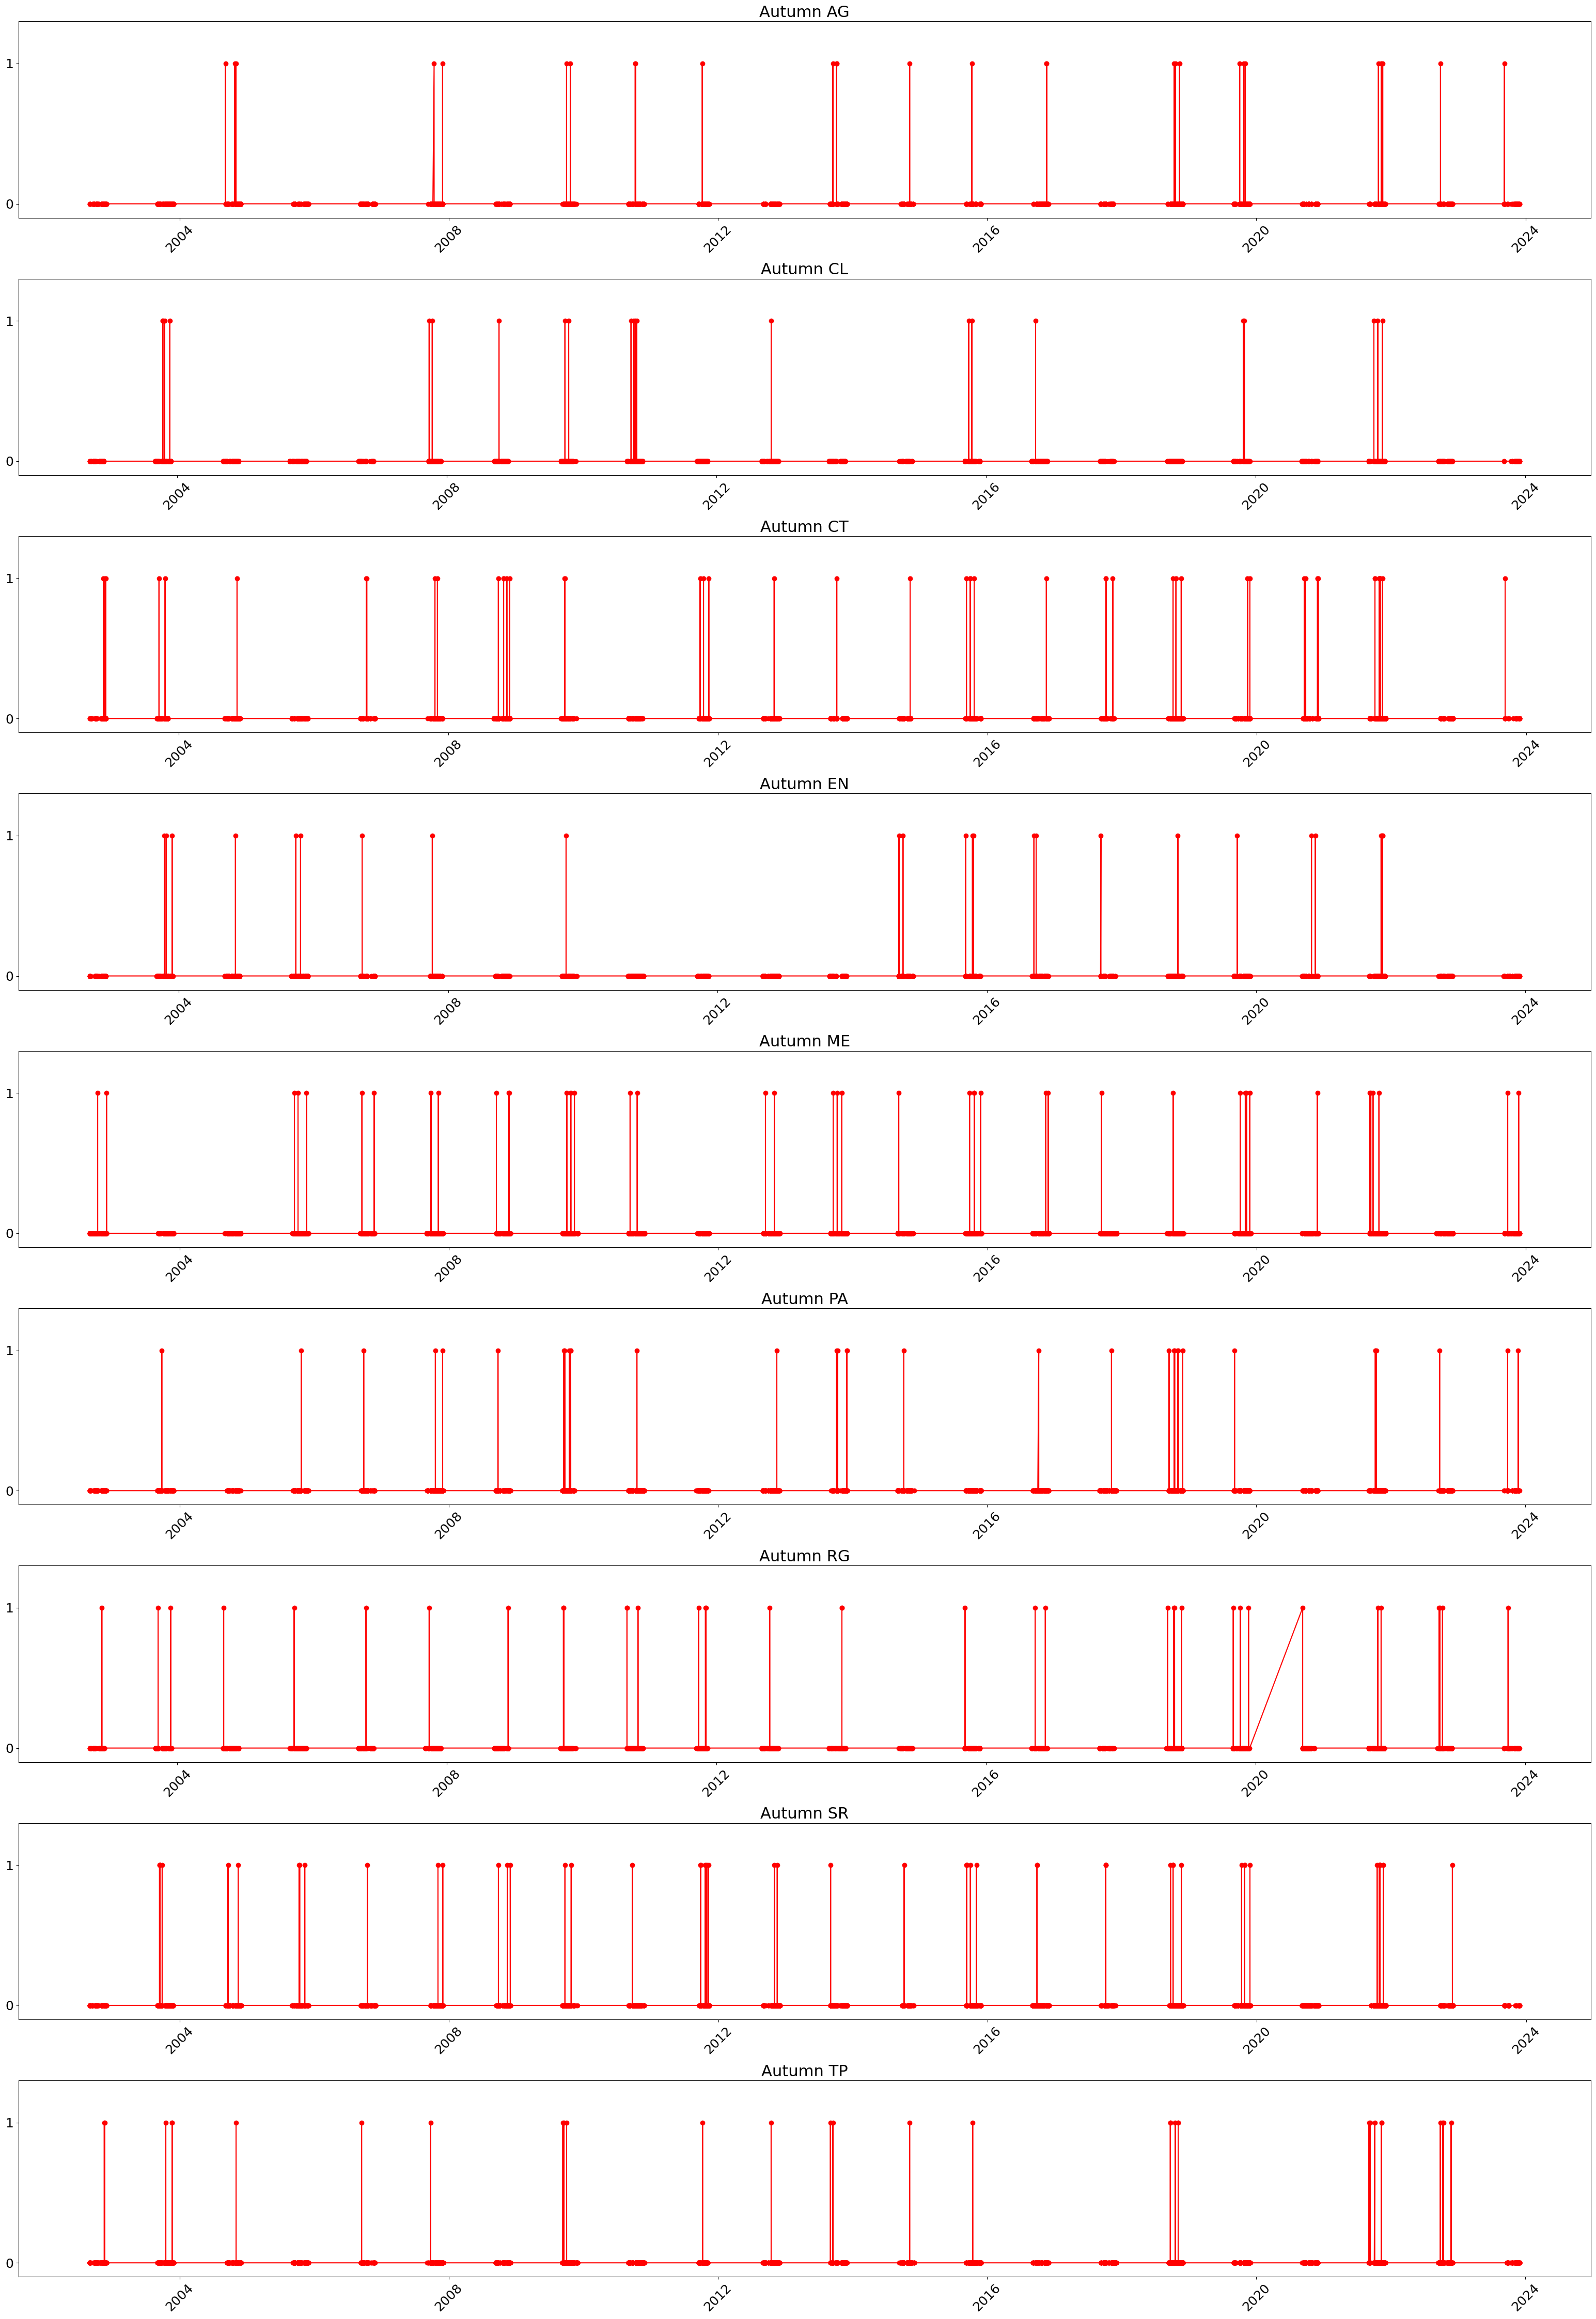

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('PAL2/01m_categorical4_updated.csv')

# Ensure DATETIME is a datetime object
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

# Dictionary to map station IDs to names
stations_of_interest = {
    779: "TP",
    750: "PA",
    684: "AG",
    695: "CL",
    718: "EN",
    756: "RG",
    706: "CT",
    764: "SR",
    729: "ME"
}

# Get the unique stations
stations = df['STATION'].unique()

# Set up the grid of plots
num_stations = len(stations)
cols = 1  # Number of columns in the grid
rows = (num_stations // cols) + (num_stations % cols > 0)  # Calculate number of rows needed

plt.figure(figsize=(31, rows * 5))

# Iterate over each station and create a subplot
for i, station in enumerate(stations, 1):
    station_df = df[df['STATION'] == station]
    
    plt.subplot(rows, cols, i)
    plt.plot(station_df['DATETIME'], station_df['CATEGORY'], marker='o', linestyle='-', color='#FF0000')
    
    # Use the station name from the dictionary for the title, fallback to the station ID if not found
    station_name = stations_of_interest.get(station, str(station))
    plt.title(f'Autumn {station_name}', fontsize=22)
    
    # Add other labels with increased fontsize
    #plt.xlabel('DateTime', fontsize=14)
    #plt.ylabel('Category', fontsize=14)
    plt.ylim(-0.1, 1.3)  # Set y-limits to clearly see category 0 and 1
    plt.yticks([0, 1], fontsize=18)  # Set y-ticks to show only 0 and 1
    plt.xticks(rotation=45, fontsize=18)  # Rotate the x-axis labels and set fontsize
    plt.grid(False)

plt.tight_layout()
plt.savefig('PAL2/01m_categorical4.jpg', dpi=300, format='jpg')  # Save as JPEG with DPI=300
plt.show()


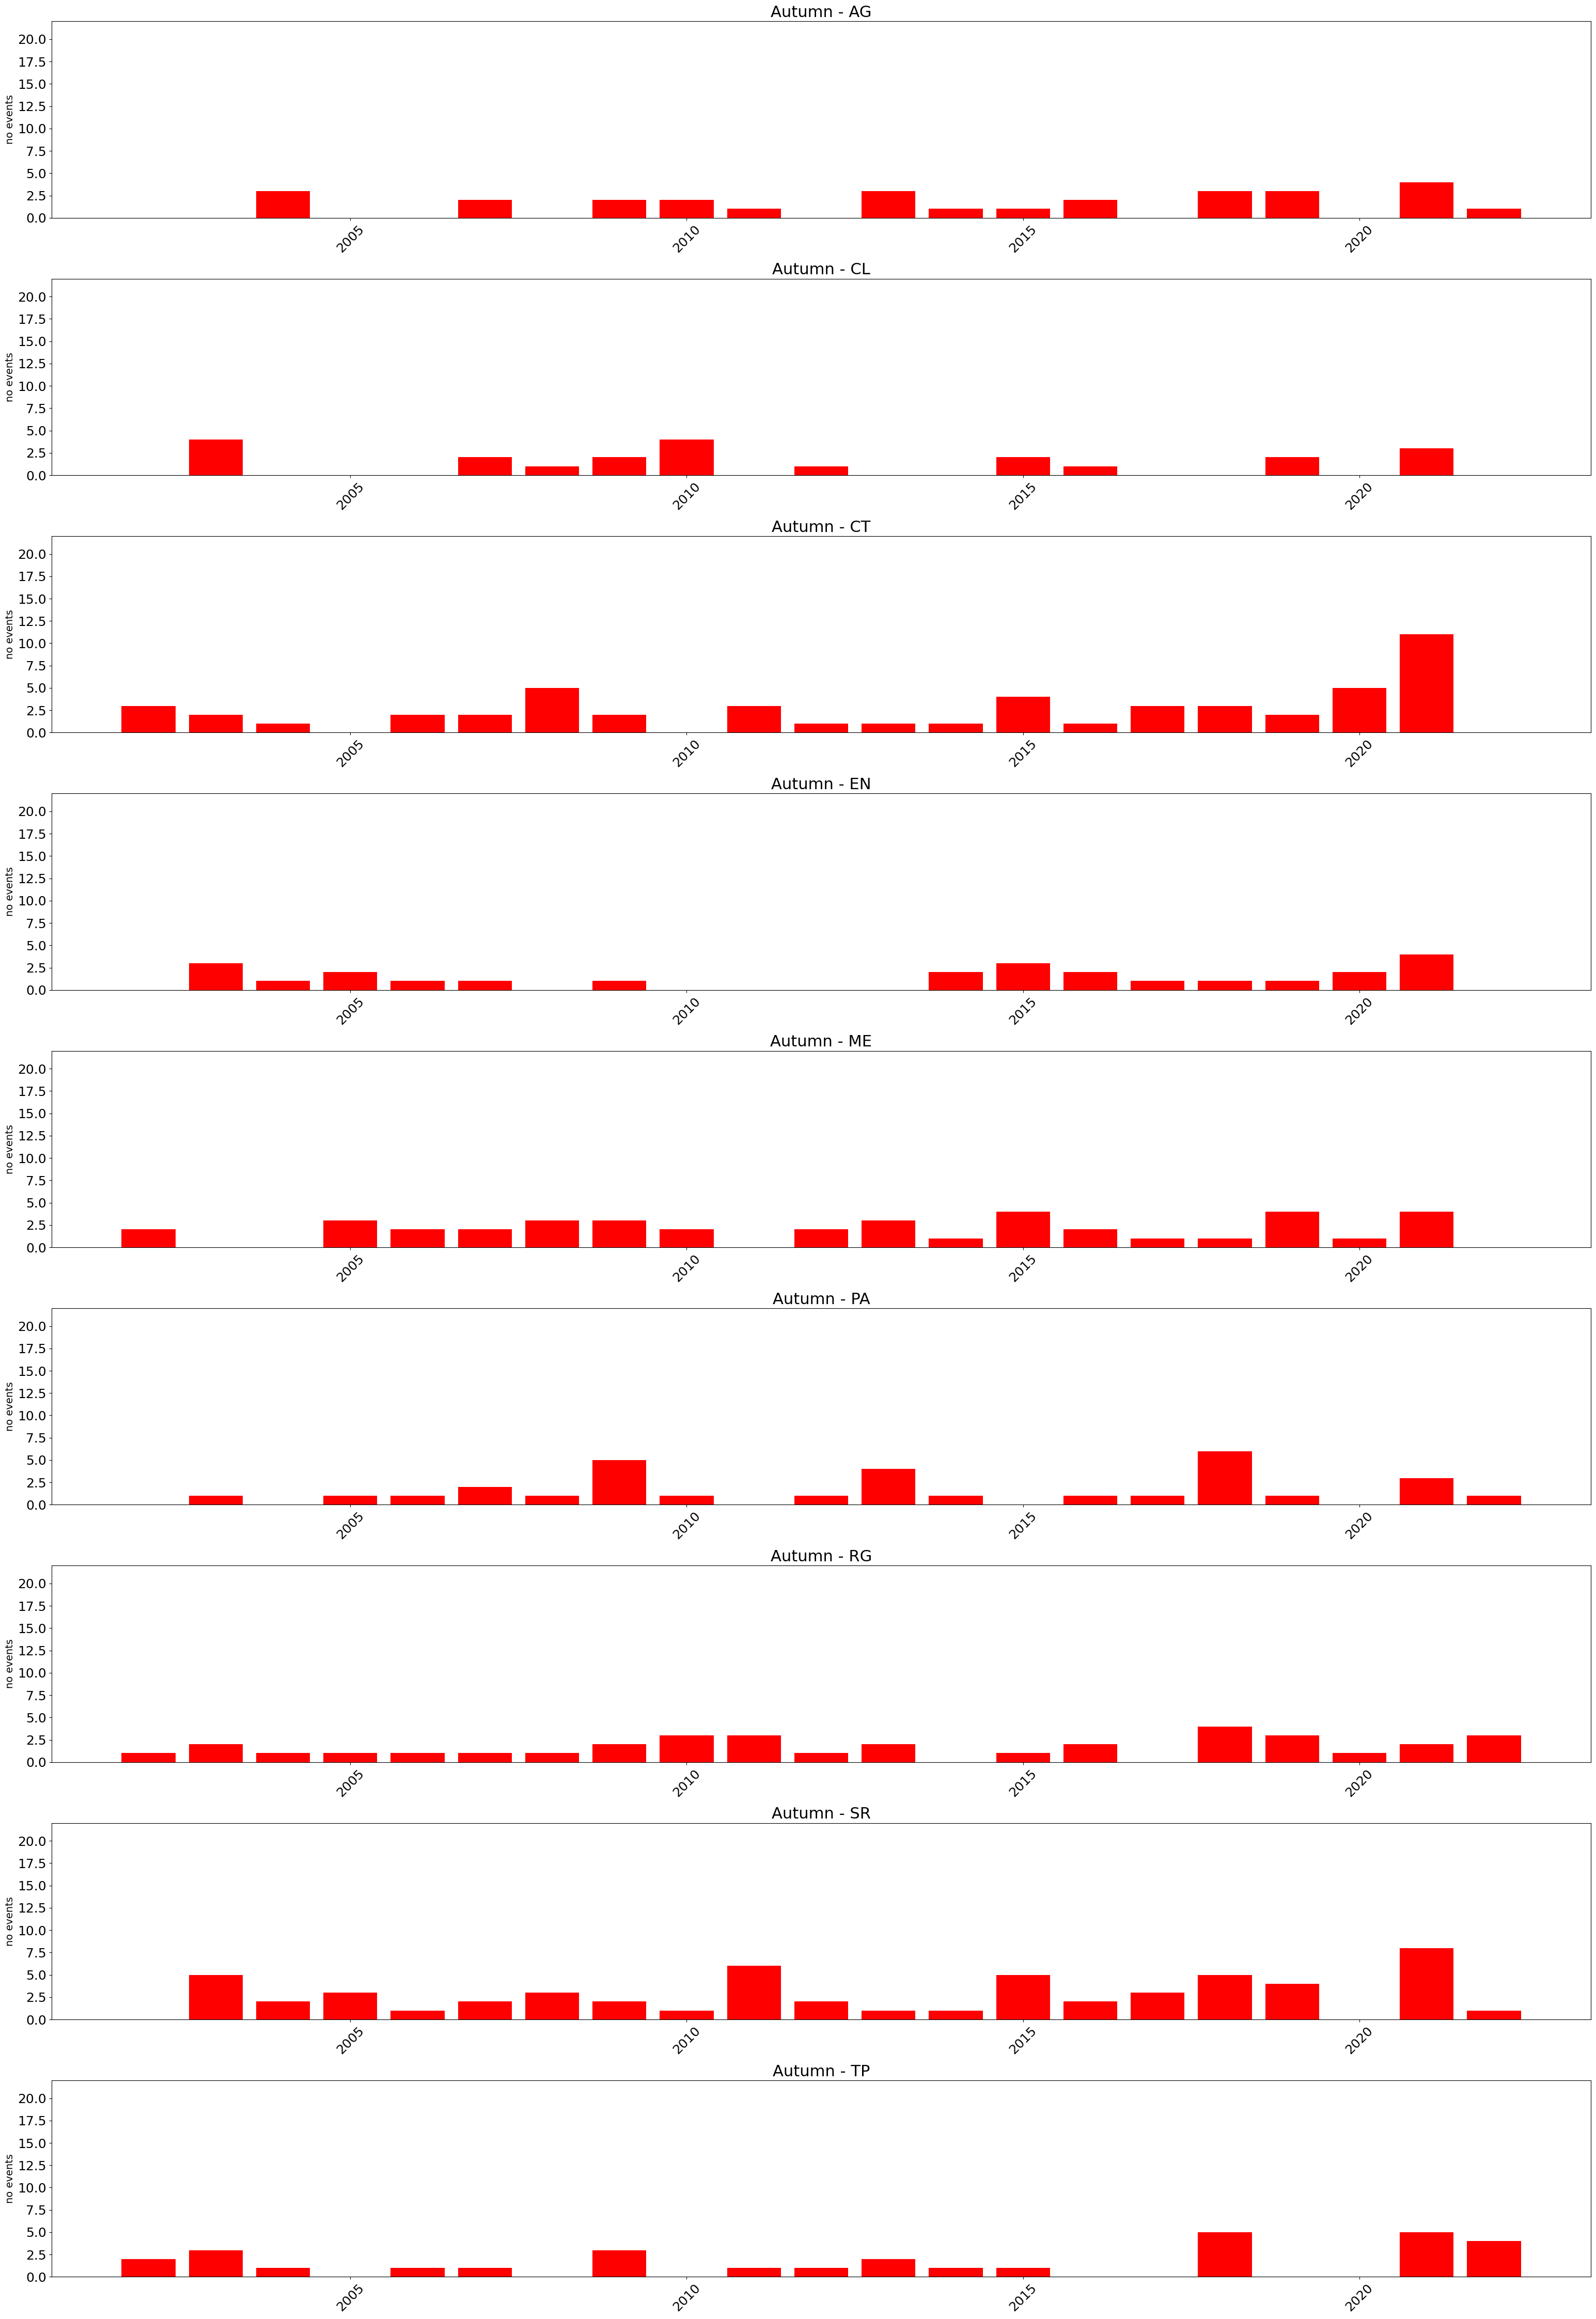

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('PAL2/01m_categorical4_updated.csv')

# Ensure DATETIME is a datetime object
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

# Dictionary to map station IDs to names
stations_of_interest = {
    779: "TP",
    750: "PA",
    684: "AG",
    695: "CL",
    718: "EN",
    756: "RG",
    706: "CT",
    764: "SR",
    729: "ME"
}

# Add a year column for grouping
df['YEAR'] = df['DATETIME'].dt.year

# Filter out the CATEGORY == 1
df_1 = df[df['CATEGORY'] == 1]

# Group by station and year and count occurrences of 1
df_counts = df_1.groupby(['STATION', 'YEAR']).size().reset_index(name='COUNT')

# Get the unique stations
stations = df['STATION'].unique()

# Get the full range of years
years = pd.date_range(df['DATETIME'].min(), df['DATETIME'].max(), freq='Y').year

# Set up the grid of plots
num_stations = len(stations)
cols = 1  # Number of columns in the grid
rows = (num_stations // cols) + (num_stations % cols > 0)  # Calculate number of rows needed

plt.figure(figsize=(31, rows * 5))

# Iterate over each station and create a subplot
for i, station in enumerate(stations, 1):
    station_df = df_counts[df_counts['STATION'] == station].set_index('YEAR').reindex(years, fill_value=0).reset_index()
    
    plt.subplot(rows, cols, i)
    plt.bar(station_df['index'], station_df['COUNT'], color='#FF0000')
    
    # Use the station name from the dictionary for the title, fallback to the station ID if not found
    station_name = stations_of_interest.get(station, str(station))
    plt.title(f'Autumn - {station_name}', fontsize=22)
    
    # Add other labels with increased fontsize
    #plt.xlabel('Year', fontsize=14)
    plt.ylabel('no events', fontsize=14)
    plt.xticks(rotation=45, fontsize=18)  # Rotate the x-axis labels and set fontsize
    plt.yticks(fontsize=18)
    plt.ylim(0,22)
    plt.grid(False)

plt.tight_layout()
plt.savefig('PAL2/01m_categorical4_counts_per_year_bar.jpg', dpi=300, format='jpg')  # Save as JPEG with DPI=300
plt.show()


In [ ]:
1 640
2 330
3 58
4 328

In [23]:
import pandas as pd

# Load the updated CSV file
df = pd.read_csv('PAL2/01m_categorical4_updated.csv')

# Filter the DataFrame to only include rows where CATEGORY == 1
category_1_df = df[df['CATEGORY'] == 1]

# Print the filtered DataFrame
print(category_1_df)

# If you want to save this filtered DataFrame to a new CSV file, you can do so with:
#category_1_df.to_csv('01m_categorical4_category1.csv', index=False)


       STATION             DATETIME  VALUE  CATEGORY
656        729  2002-10-11 08:20:00   13.4         1
1507       706  2002-11-18 10:50:00    5.6         1
1572       779  2002-11-21 03:20:00    5.0         1
1626       756  2002-11-21 12:50:00    3.0         1
1731       706  2002-11-26 15:40:00    7.6         1
...        ...                  ...    ...       ...
60222      779  2022-11-23 18:30:00    3.0         1
60368      764  2022-11-26 08:00:00    2.8         1
61142      706  2023-09-07 18:30:00    8.2         1
61319      756  2023-09-30 14:40:00   10.8         1
61989      706  2023-11-22 18:50:00   12.4         1

[167 rows x 4 columns]


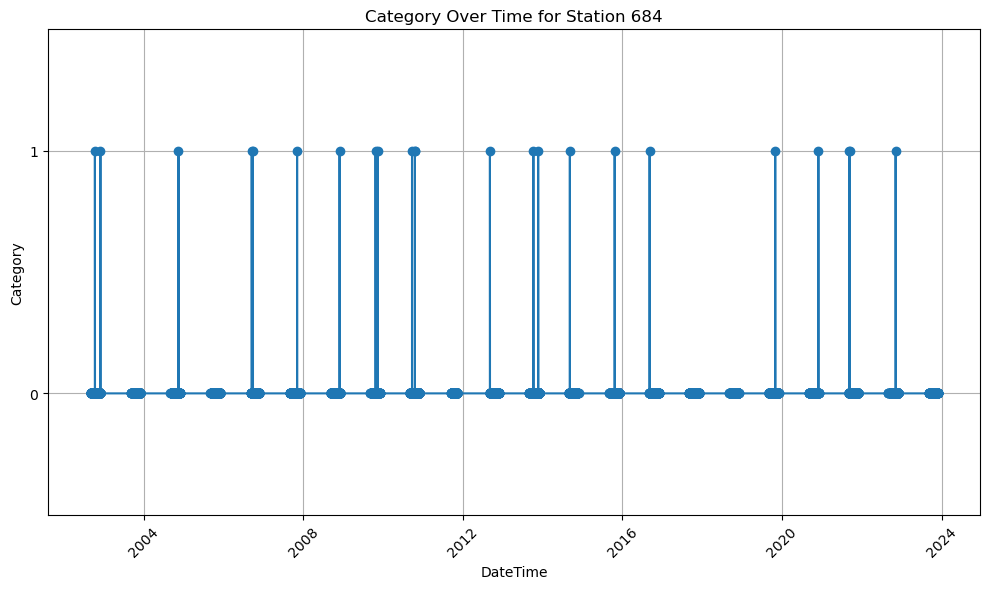

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('PAL2/01m_categorical4_updated_replaced.csv')

# Ensure DATETIME is a datetime object
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

# Filter the data for station 684
station_df = df[df['STATION'] == 729]

# Plot the CATEGORY over time
plt.figure(figsize=(10, 6))
plt.plot(station_df['DATETIME'], station_df['CATEGORY'], marker='o', linestyle='-')

# Add titles and labels
plt.title('Category Over Time for Station 684')
plt.xlabel('DateTime')
plt.ylabel('Category')
plt.ylim(-0.5, 1.5)  # Set y-limits to clearly see category 0 and 1
plt.yticks([0, 1])  # Set y-ticks to show only 0 and 1

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


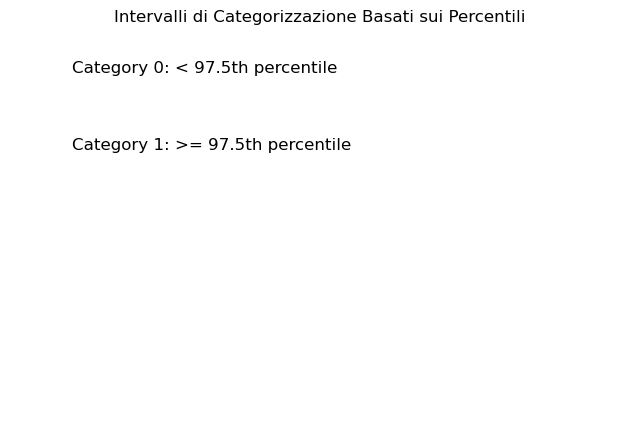

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Intervalli e categorie
categories = ['< 97.5th percentile', '>= 97.5th percentile']
values = [0, 1]

# Crea una figura
fig, ax = plt.subplots(figsize=(8, 5))
ax.axis('off')  # Rimuovi gli assi

# Aggiungi la legenda manualmente
for i, (category, value) in enumerate(zip(categories, values)):
    ax.text(0.1, 0.9 - i * 0.2, f'Category {value}: {category}', fontsize=12, verticalalignment='center')

# Mostra il grafico
plt.title('Intervalli di Categorizzazione Basati sui Percentili')
plt.show()

In [ ]:
FINEEEEEEEEEEEEEEEEEEEE

In [ ]:
NOt considere

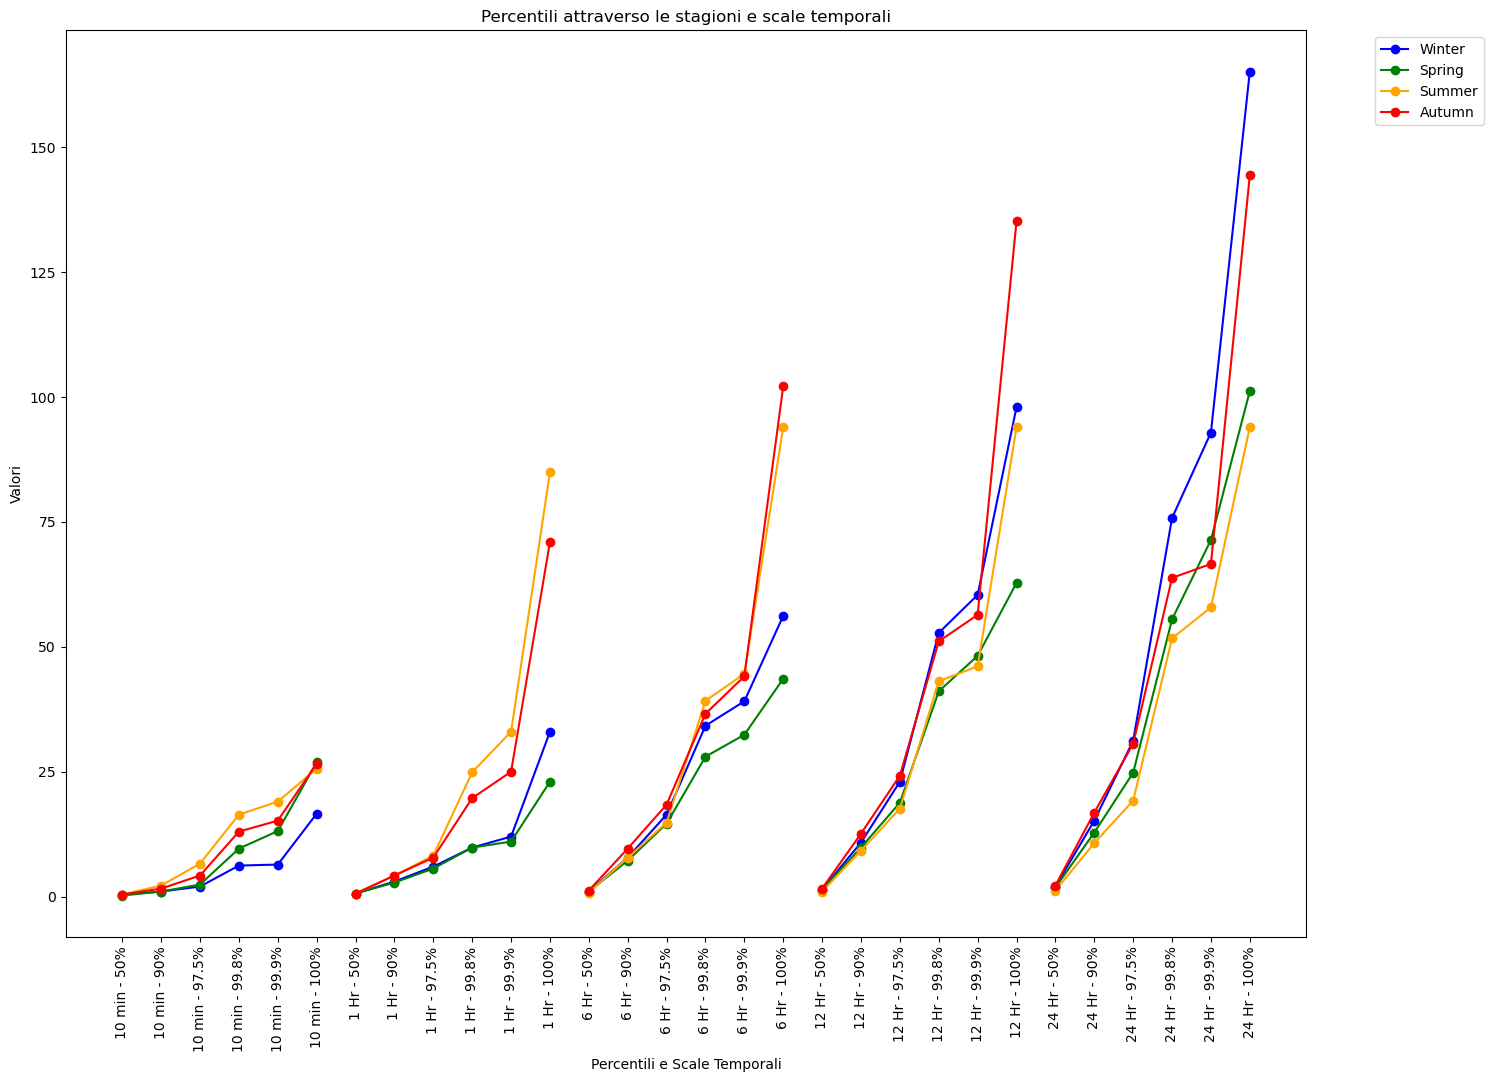

In [8]:
import matplotlib.pyplot as plt

# Dati di esempio
stagioni = ['Winter', 'Spring', 'Summer', 'Autumn']
percentili = ['50%', '90%', '97.5%', '99.8%', '99.9%', '100%']
scale_temporali = ['10 min', '1 Hr', '6 Hr', '12 Hr', '24 Hr']

# Supponiamo di avere i seguenti dati per ciascuna scala temporale
dati = {
    'Winter': {
        '10 min': [0.4, 1.0, 2.0, 6.2, 6.4, 16.6],
        '1 Hr': [0.6, 3.0, 6.0, 9.8, 12.0, 33.0],
        '6 Hr': [1.0, 7.8, 16.4, 34.2, 39.1, 56.2],
        '12 Hr': [1.4, 10.8, 23.0, 52.8, 60.4, 98.0],
        '24 Hr': [2.0, 15.2, 31.2, 75.8, 92.9, 165.2],
    },
    'Spring': {
        '10 min': [0.2, 1.0, 2.4, 9.6, 13.1, 26.9],
        '1 Hr': [0.6, 2.8, 5.6, 9.8, 11.0, 23.0],
        '6 Hr': [1.0, 7.2, 14.6, 28.0, 32.4, 43.6],
        '12 Hr': [1.4, 9.8, 18.8, 41.1, 48.2, 62.8],
        '24 Hr': [1.8, 12.8, 24.8, 55.5, 71.4, 101.2],
    },
    'Summer': {
        '10 min': [0.4, 2.2, 6.6, 16.4, 19.0, 25.6],
        '1 Hr': [0.6, 4.2, 8.2, 24.9, 33.0, 85.0],
        '6 Hr': [0.8, 7.8, 14.8, 39.2, 44.6, 94.0],
        '12 Hr': [1.0, 9.2, 17.6, 43.1, 46.1, 94.0],
        '24 Hr': [1.2, 10.7, 19.2, 51.7, 57.9, 94.0],
    },
    'Autumn': {
        '10 min': [0.4, 1.6, 4.2, 13.0, 15.2, 26.6],
        '1 Hr': [0.6, 4.2, 7.8, 19.7, 25.0, 71.0],
        '6 Hr': [1.2, 9.6, 18.4, 36.6, 44.1, 102.2],
        '12 Hr': [1.6, 12.6, 24.2, 51.1, 56.4, 135.2],
        '24 Hr': [2.2, 16.8, 30.6, 63.8, 66.6, 144.4],
    },
}

# Colori per le stagioni
colori = {
    'Winter': 'b',
    'Spring': 'g',
    'Summer': '#FFA500',
    'Autumn': '#FF0000',
}

# Creare il grafico con dimensioni maggiori
fig, ax = plt.subplots(figsize=(15, 10))

for stagione in stagioni:
    for scala in scale_temporali:
        x_values = [f"{scala} - {percentile}" for percentile in percentili]
        y_values = dati[stagione][scala]
        ax.plot(x_values, y_values, marker='o', color=colori[stagione], label=stagione)

# Aggiungere titolo e etichette
plt.title('Percentili attraverso le stagioni e scale temporali')
plt.xlabel('Percentili e Scale Temporali')
plt.ylabel('Valori')

# Aggiungere la leggenda fuori dal grafico
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

# Aggiungere layout regolato
plt.tight_layout()

# Mostrare il grafico
plt.xticks(rotation=90)
plt.show()


In [30]:
import pandas as pd

# Step 1: Load the updated CSV file
df = pd.read_csv('PAL2/01m_categorical4_updated.csv')

# Ensure DATETIME is a datetime object
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

# Step 2: Replace CATEGORY 3 with CATEGORY 2
df['CATEGORY'] = df['CATEGORY'].replace(3, 2)

# Step 3: Process each station separately
final_df_list = []

for station, station_df in df.groupby('STATION'):
    # Identify sequences of successive CATEGORY 2 values within each station
    station_df['IS_NEW_EVENT'] = (station_df['CATEGORY'].shift(1) != station_df['CATEGORY']) & (station_df['CATEGORY'] == 2)
    station_df['EVENT_ID'] = station_df['IS_NEW_EVENT'].cumsum()

    # Aggregate each sequence of CATEGORY 2 into a single row
    events = station_df[station_df['CATEGORY'] == 2].groupby('EVENT_ID').agg({
        'STATION': 'first',
        'DATETIME': 'first',  # Start time of the event
        'VALUE': lambda x: 0, # Set VALUE to 0 for the event
        'CATEGORY': lambda x: 0  # Set CATEGORY to 0
    }).reset_index(drop=True)

    # Combine the new "no rain event" rows with the original rows not involved in any events
    station_df_unchanged = station_df[station_df['CATEGORY'] != 2]
    station_final_df = pd.concat([station_df_unchanged, events]).sort_values(by='DATETIME')
    
    # Drop the 'IS_NEW_EVENT' and 'EVENT_ID' columns
    station_final_df = station_final_df.drop(columns=['IS_NEW_EVENT', 'EVENT_ID'], errors='ignore')
    
    # Add the processed station dataframe to the final list
    final_df_list.append(station_final_df)

# Step 4: Concatenate all processed station dataframes
final_df = pd.concat(final_df_list).sort_values(by=['STATION', 'DATETIME'])

# Step 5: Save the updated DataFrame to a new CSV file
final_df.to_csv('PAL2/01m_categorical4_final.csv', index=False)

# Display the first few rows of the updated DataFrame to verify
print(final_df.head(20))


      STATION            DATETIME  VALUE  CATEGORY
0         684 2002-09-01 13:30:00    0.0         0
346       684 2003-10-15 10:20:00   10.0         1
1         684 2003-10-15 10:30:00    0.0         0
564       684 2004-09-06 15:30:00   10.8         1
2         684 2004-09-06 15:40:00    0.0         0
668       684 2004-11-02 16:20:00    4.8         1
3         684 2004-11-02 16:30:00    0.0         0
2341      684 2007-10-13 19:30:00    4.4         1
4         684 2007-10-13 19:40:00    0.0         0
2675      684 2009-10-01 18:20:00   12.8         1
5         684 2009-10-01 18:30:00    0.0         0
2689      684 2009-10-02 04:30:00    3.4         1
6         684 2009-10-02 04:40:00    0.0         0
2786      684 2009-10-22 02:40:00   10.2         1
7         684 2009-10-22 02:50:00    0.0         0
3374      684 2012-10-23 21:10:00    6.4         1
8         684 2012-10-23 21:20:00    0.0         0
3401      684 2012-10-24 21:30:00    3.2         1
9         684 2012-10-24 21:40: